In [1]:
import pandas as pd

# Assignment 1: Date Formats and Date Parts

* First, convert the `date` column to datetime64, by any method.

* Then, create a column representing the time difference between the last date in the data and each date. 

* Next, create columns for the date parts year, month, and weekday.

* Finally, format the date to Year-Month-Day (This will be a string/object).

In [2]:
# read in transactions.csv 
transactions = pd.read_csv('transactions.csv', parse_dates=['date'])
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [3]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


In [4]:
transactions = transactions.assign(
    time_to_last_day = transactions['date'].max() - transactions['date'],
    year = transactions['date'].dt.year,
    quarter = transactions['date'].dt.quarter,
    month = transactions['date'].dt.month,
    end_of_month = transactions['date'] + pd.tseries.offsets.MonthEnd(),
    day_of_week = transactions['date'].dt.dayofweek
)
transactions.head()

,date,store_nbr,transactions,time_to_last_day,year,quarter,month,end_of_month,day_of_week
0,2013-01-01,25,770,1687 days,2013,1,1,2013-01-31,1
1,2013-01-02,1,2111,1686 days,2013,1,1,2013-01-31,2
2,2013-01-02,2,2358,1686 days,2013,1,1,2013-01-31,2
3,2013-01-02,3,3487,1686 days,2013,1,1,2013-01-31,2
4,2013-01-02,4,1922,1686 days,2013,1,1,2013-01-31,2


In [5]:
transactions['date'] = transactions['date'].dt.strftime('%Y-%m-%d')

In [6]:
transactions.head()

,date,store_nbr,transactions,time_to_last_day,year,quarter,month,end_of_month,day_of_week
0,2013-01-01,25,770,1687 days,2013,1,1,2013-01-31,1
1,2013-01-02,1,2111,1686 days,2013,1,1,2013-01-31,2
2,2013-01-02,2,2358,1686 days,2013,1,1,2013-01-31,2
3,2013-01-02,3,3487,1686 days,2013,1,1,2013-01-31,2
4,2013-01-02,4,1922,1686 days,2013,1,1,2013-01-31,2


In [7]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   date              83488 non-null  object         
 1   store_nbr         83488 non-null  int64          
 2   transactions      83488 non-null  int64          
 3   time_to_last_day  83488 non-null  timedelta64[ns]
 4   year              83488 non-null  int32          
 5   quarter           83488 non-null  int32          
 6   month             83488 non-null  int32          
 7   end_of_month      83488 non-null  datetime64[ns] 
 8   day_of_week       83488 non-null  int32          
dtypes: datetime64[ns](1), int32(4), int64(2), object(1), timedelta64[ns](1)
memory usage: 4.5+ MB


# Assignment 2: Time Arithmetic


Hi again,

I just got word the the true max date in our data was three weeks after 2017-08-15.

* Can you add three weeks to the ‘time_to_last_date’ column? 
* Then, calculate ‘weeks_to_last_date’ by dividing the number of days  in ‘time_to_last_date’ by 7.

Thanks

In [8]:
# overwrite previous transactions df and convert date column

transactions = pd.read_csv("transactions.csv", parse_dates=["date"])

In [9]:
transactions.tail()

,date,store_nbr,transactions
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932
83487,2017-08-15,54,802


In [10]:
# recreate columns from assignment 1 using assign

transactions = transactions.assign(
    time_to_last_day = transactions['date'].max() - transactions['date'],
    year = transactions['date'].dt.year,
    quarter = transactions['date'].dt.quarter,
    month = transactions['date'].dt.month,
    end_of_month = transactions['date'] + pd.tseries.offsets.MonthEnd(),
    day_of_week = transactions['date'].dt.dayofweek
)
transactions.head()

,date,store_nbr,transactions,time_to_last_day,year,quarter,month,end_of_month,day_of_week
0,2013-01-01,25,770,1687 days,2013,1,1,2013-01-31,1
1,2013-01-02,1,2111,1686 days,2013,1,1,2013-01-31,2
2,2013-01-02,2,2358,1686 days,2013,1,1,2013-01-31,2
3,2013-01-02,3,3487,1686 days,2013,1,1,2013-01-31,2
4,2013-01-02,4,1922,1686 days,2013,1,1,2013-01-31,2


In [11]:
transactions['time_to_last_day'] = transactions['time_to_last_day'] + pd.to_timedelta(3, unit='W')

In [12]:
transactions.head()

,date,store_nbr,transactions,time_to_last_day,year,quarter,month,end_of_month,day_of_week
0,2013-01-01,25,770,1708 days,2013,1,1,2013-01-31,1
1,2013-01-02,1,2111,1707 days,2013,1,1,2013-01-31,2
2,2013-01-02,2,2358,1707 days,2013,1,1,2013-01-31,2
3,2013-01-02,3,3487,1707 days,2013,1,1,2013-01-31,2
4,2013-01-02,4,1922,1707 days,2013,1,1,2013-01-31,2


In [13]:
transactions.assign(
    weeks_to_last_day = ((transactions['time_to_last_day'].dt.days) / 7).round(2)
)

,date,store_nbr,transactions,time_to_last_day,year,quarter,month,end_of_month,day_of_week,weeks_to_last_day
0,2013-01-01,25,770,1708 days,2013,1,1,2013-01-31,1,244.00
1,2013-01-02,1,2111,1707 days,2013,1,1,2013-01-31,2,243.86
2,2013-01-02,2,2358,1707 days,2013,1,1,2013-01-31,2,243.86
3,2013-01-02,3,3487,1707 days,2013,1,1,2013-01-31,2,243.86
4,2013-01-02,4,1922,1707 days,2013,1,1,2013-01-31,2,243.86
...,...,...,...,...,...,...,...,...,...,...
83483,2017-08-15,50,2804,21 days,2017,3,8,2017-08-31,1,3.00
83484,2017-08-15,51,1573,21 days,2017,3,8,2017-08-31,1,3.00
83485,2017-08-15,52,2255,21 days,2017,3,8,2017-08-31,1,3.00
83486,2017-08-15,53,932,21 days,2017,3,8,2017-08-31,1,3.00


# Assignment 3: Missing Time Series Data

Take a look at the mean value for the oil price using forward fill, backfill, and interpolation. Are they very different?

Then, plot the series with forward fill for:
 * The year 2014.
 * The month of December 2014.
 * The days from December 1st to December 15th, 2014.


In [14]:
# Read in oil csv with date as index (and converted to datetime64)
oil = pd.read_csv("oil.csv", 
                  index_col="date", 
                  parse_dates=True)
oil.head()

,dcoilwtico
date,
2013-01-01,NaN
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20


In [15]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1218 entries, 2013-01-01 to 2017-08-31
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dcoilwtico  1175 non-null   float64
dtypes: float64(1)
memory usage: 19.0 KB


In [16]:
# This is a synonym for datetime64

oil.index.dtype

dtype('<M8[ns]')

In [17]:
ffil_oil = oil.ffill()
ffil_oil.head()

,dcoilwtico
date,
2013-01-01,NaN
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20


In [18]:
ffil_oil.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1218 entries, 2013-01-01 to 2017-08-31
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dcoilwtico  1217 non-null   float64
dtypes: float64(1)
memory usage: 19.0 KB


In [19]:
bfil_oil = oil.bfill()
bfil_oil.head()

,dcoilwtico
date,
2013-01-01,93.14
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20


In [20]:
bfil_oil.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1218 entries, 2013-01-01 to 2017-08-31
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dcoilwtico  1218 non-null   float64
dtypes: float64(1)
memory usage: 19.0 KB


In [21]:
interpol_oil = oil.interpolate()
interpol_oil.head()

,dcoilwtico
date,
2013-01-01,NaN
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20


In [22]:
interpol_oil.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1218 entries, 2013-01-01 to 2017-08-31
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dcoilwtico  1217 non-null   float64
dtypes: float64(1)
memory usage: 19.0 KB


In [23]:
print(oil.mean())
print(ffil_oil.mean())
print(bfil_oil.mean())
print(interpol_oil.mean())

dcoilwtico    67.714366
dtype: float64
dcoilwtico    67.671249
dtype: float64
dcoilwtico    67.673325
dtype: float64
dcoilwtico    67.661824
dtype: float64


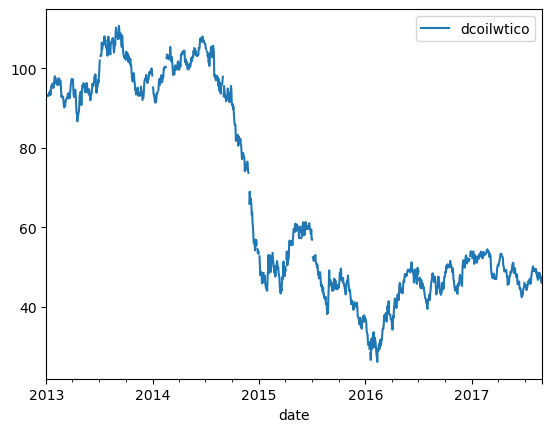

In [24]:
oil.plot();

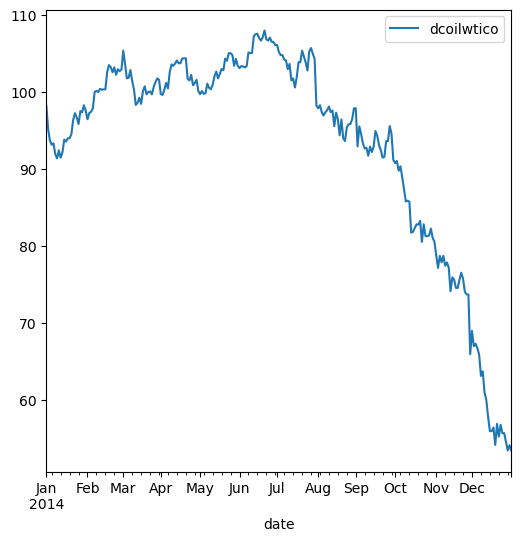

In [25]:
ffil_oil.loc['2014'].plot(figsize=(6,6));

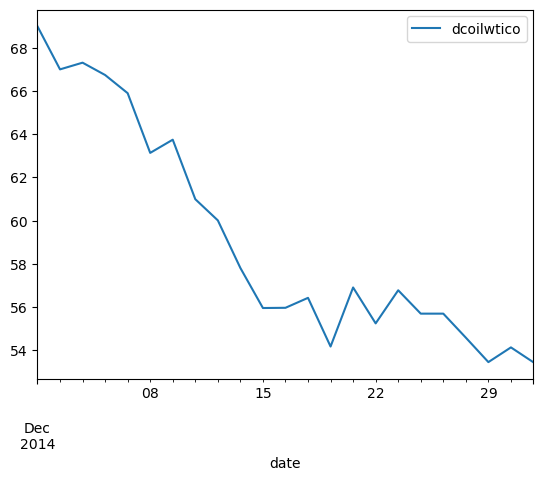

In [26]:
ffil_oil.loc['2014-12'].plot();

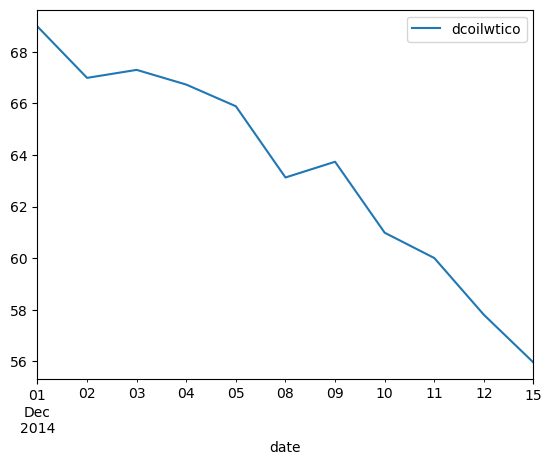

In [27]:
ffil_oil.loc['2014-12-01':'2014-12-15'].plot();

# Assignment 4: Shift and Diff

Hello,
I’m looking into a few different year over year trends related to changes made at store 47.

Can you plot the sum of monthly of transactions in year 2015 vs the sum of monthly transactions in the year prior for store 47?

Make sure to group your DataFrame by year AND month!

Thanks

In [80]:
transactions = pd.read_csv("transactions.csv", parse_dates=['date'])
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [83]:
transactions_store_47 = transactions.loc[transactions['store_nbr']==47, ['date', 'transactions']]
transactions_store_47.head()

,date,transactions
41,2013-01-02,4161
87,2013-01-03,3660
133,2013-01-04,3915
179,2013-01-05,4764
225,2013-01-06,4935


In [85]:
new_transactions_store_47 = (transactions_store_47
                   .groupby([transactions_47['date'].dt.year,transactions_47['date'].dt.month])
                   .agg({'transactions':'sum'})
                  )

In [86]:
transactions_47 = new_transactions_store_47.assign(Year_prior = new_transactions_store_47['transactions'].shift(12))
transactions_47

transactions  Year_prior
date date                          
2013 1           109668         NaN
     2           103706         NaN
     3           116873         NaN
     4           108571         NaN
     5           113532         NaN
     6           110637         NaN
     7           107506         NaN
     8           112001         NaN
     9           114468         NaN
     10          114585         NaN
     11          114436         NaN
     12          150204         NaN
2014 1           114190    109668.0
     2           107175    103706.0
     3           121771    116873.0
     4           122976    108571.0
     5           126298    113532.0
     6           118398    110637.0
     7           118522    107506.0
     8           121949    112001.0
     9           115552    114468.0
     10          116741    114585.0
     11          116996    114436.0
     12          147371    150204.0
2015 1           118445    114190.0
     2           108186    107175.0
     3           119883    121771.0
     4           118449    122976.0
     5           120810    126298.0
     6           110814    118398.0
     7           116234    118522.0
     8           119307    121949.0
     9           112975    115552.0
     10          117712    116741.0
     11          117564    116996.0
     12          149747    147371.0
2016 1           108521    118445.0
     2           111132    108186.0
     3           116599    119883.0
     4           117046    118449.0
     5           115799    120810.0
     6           108539    110814.0
     7           114724    116234.0
     8           114185    119307.0
     9           112026    112975.0
     10          116242    117712.0
     11          118587    117564.0
     12          149367    149747.0
2017 1           118000    108521.0
     2           109254    111132.0
     3           119122    116599.0
     4           119174    117046.0
     5           120941    115799.0
     6           114171    108539.0
     7           120588    114724.0
     8            57541    114185.0

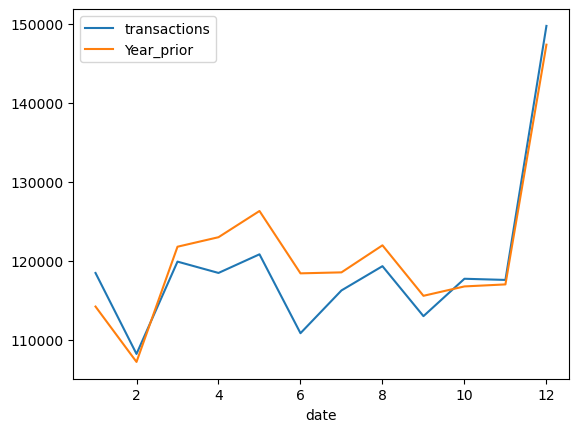

In [87]:
transactions_47.loc[2015, :].plot();

# Assignment 5: Resampling Time Series

Plot the monthly and yearly average oil prices.

In [88]:
oil.head()

,dcoilwtico
date,
2013-01-01,NaN
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20


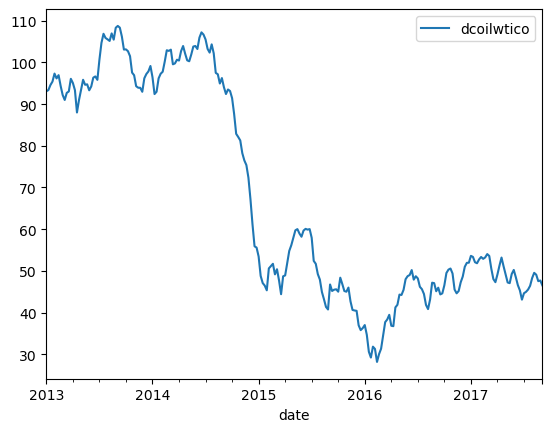

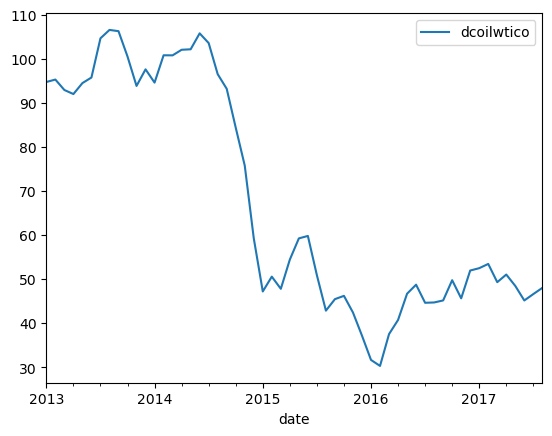

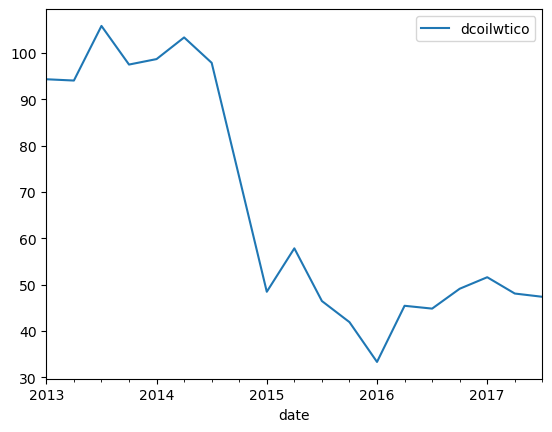

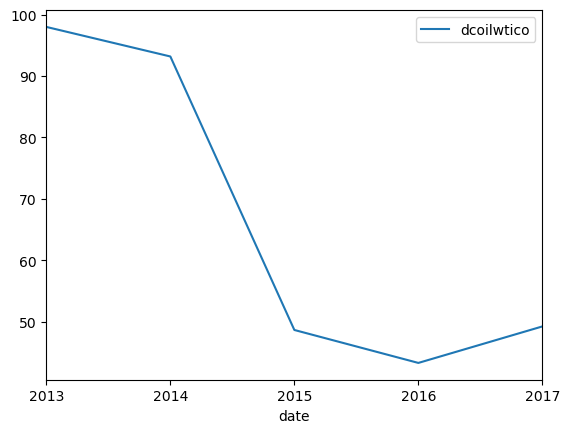

In [100]:
for period in ['W', 'M', 'Q', 'Y']:
    oil.resample(period).agg({'dcoilwtico':'mean'}).plot()

# Assignment 6: Rolling Averages

Plot the 90-day moving average for transactions for store 47.

This will help remove some of the noise from our series.

Thanks!


In [101]:
# recreate transactions_47 with date as index 

transactions_47 = (transactions
                   .loc[transactions["store_nbr"]==47, ["date", "transactions"]]
                   .set_index("date"))

transactions_47.head()

,transactions
date,
2013-01-02,4161
2013-01-03,3660
2013-01-04,3915
2013-01-05,4764
2013-01-06,4935


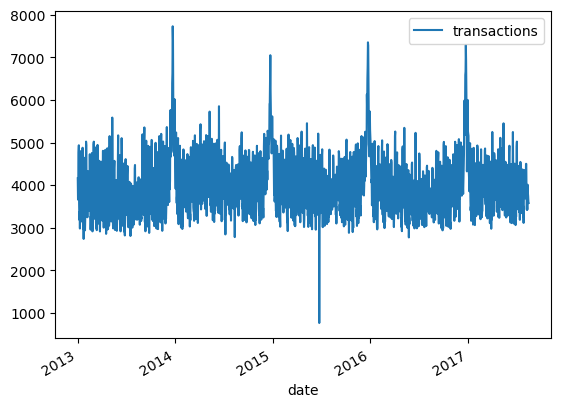

In [103]:
# original daily series for comparison

transactions_47.plot();

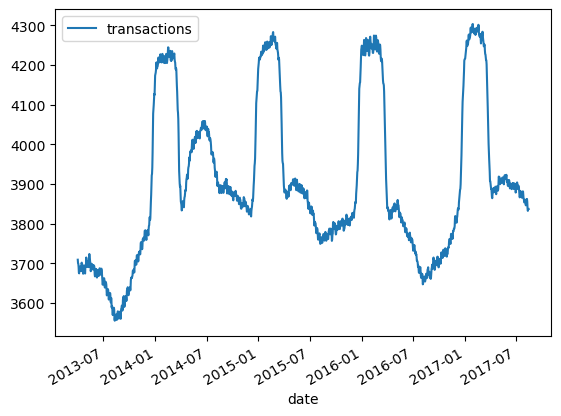

In [107]:
transactions_47.rolling(90).mean().plot();